Data exploration and cleaning

In [1]:
import pandas as pd
from click import password_option

# مثال: تحميل بيانات أمراض القلب
df = pd.read_csv('heart_disease_uci.csv')  # ملف CSV من مصدر Kaggle أو UCI
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,153.872910,54.521739,131.715719,246.785953,149.327759,1.058528,0.672241,0.946488
std,95.896287,9.030264,17.747751,52.532582,23.121062,1.162769,0.937438,1.230409
min,1.000000,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000,0.000000
25%,75.500000,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000,0.000000
50%,151.000000,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000,0.000000
75%,227.500000,61.000000,140.000000,275.500000,165.500000,1.600000,1.000000,2.000000
max,749.000000,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [7]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Data analaysis and visualization

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


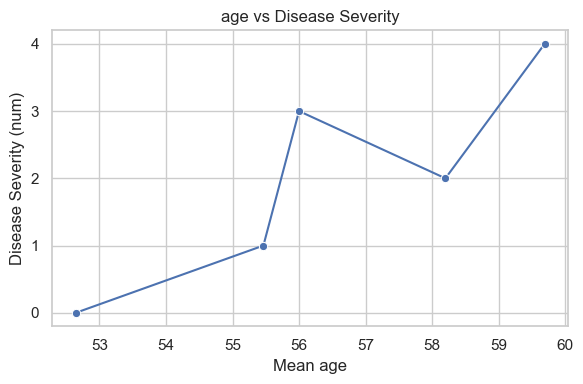

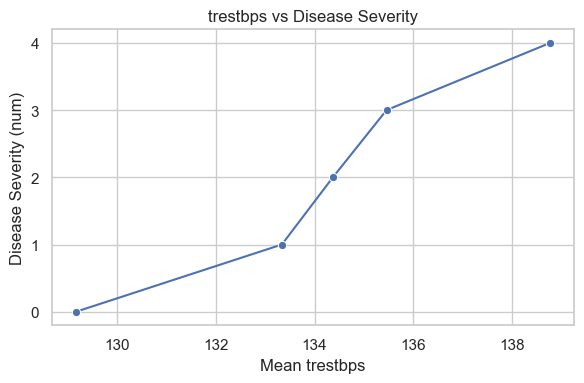

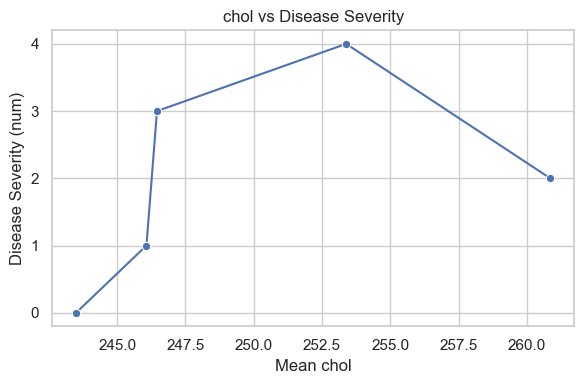

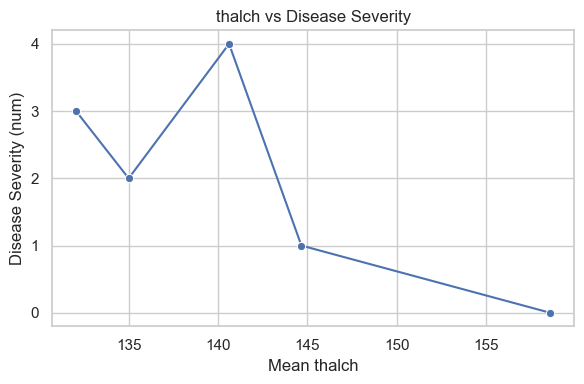

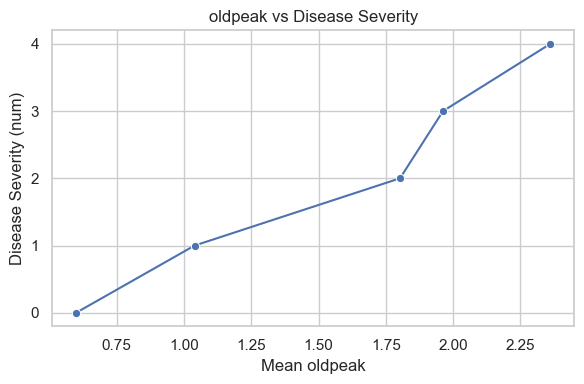

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure num is numeric and within 0–4
print(sorted(df['num'].unique()))  # Should show [0,1,2,3,4]

df['num'] = pd.to_numeric(df['num'], errors='coerce')

features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
sns.set(style='whitegrid')

for feat in features:
    fig, ax = plt.subplots(figsize=(6, 4))

    if feat == 'fbs':
        # Proportion of num classes at fbs levels 0 and 1
        data = df.groupby(['fbs', 'num']).size().unstack(fill_value=0)
        prop = data.div(data.sum(axis=1), axis=0).T  # num on rows

        sns.lineplot(data=prop, markers=True, ax=ax)
        ax.set_xlabel('Fasting Blood Sugar >120 mg/dL (fbs)')
        ax.set_ylabel('Proportion per Disease Severity')
        ax.set_title(f'Proportion by {feat} across Disease Severity')
        ax.set_yticks(range(0, 5))  # show all num levels
        ax.legend(title='fbs', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        # Mean feature value across num levels
        agg = df.groupby('num')[feat].mean()
        sns.lineplot(x=agg.values, y=agg.index, marker='o', ax=ax)
        ax.set_xlabel(f'Mean {feat}')
        ax.set_ylabel('Disease Severity (num)')
        ax.set_title(f'{feat} vs Disease Severity')
        ax.set_yticks(range(0, 5))  # ensure ticks from 0 to 4

    plt.tight_layout()
    plt.show()

C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


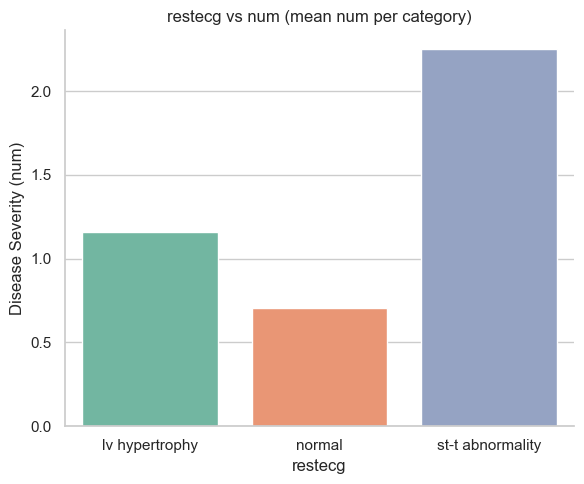

C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


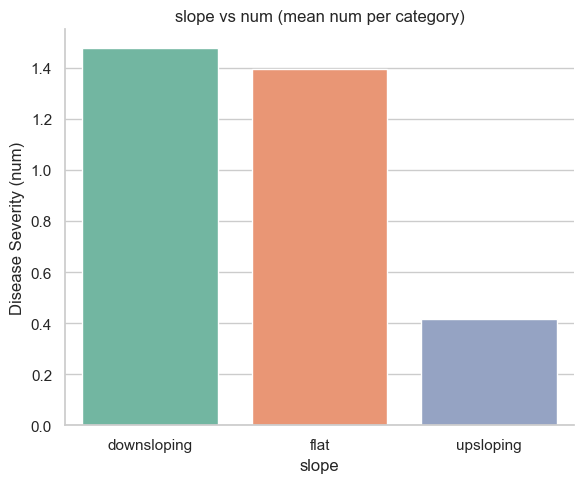

C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


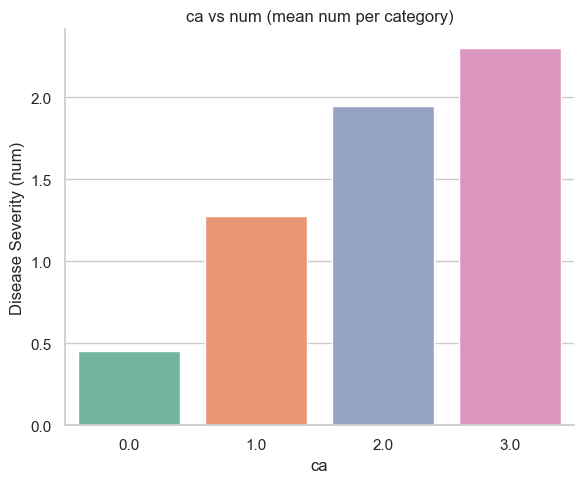

C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


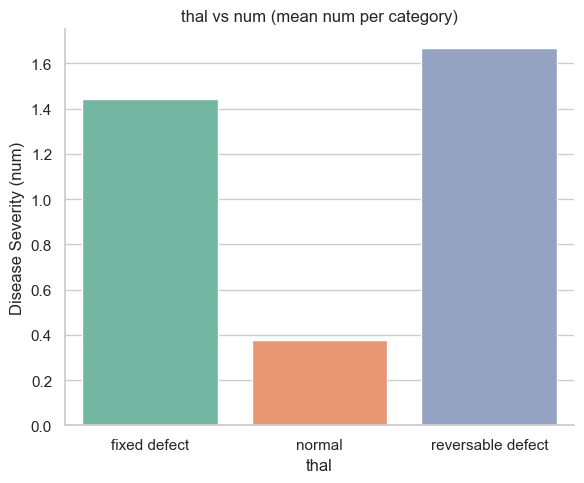

C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


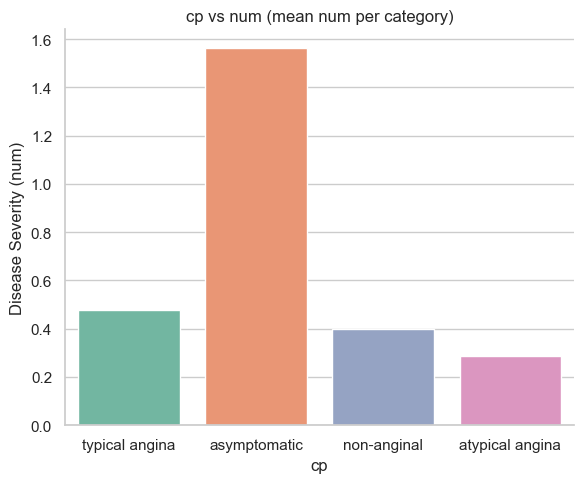

C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


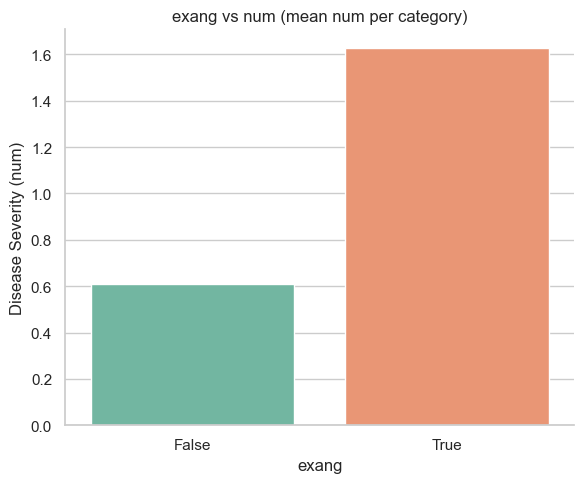

C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


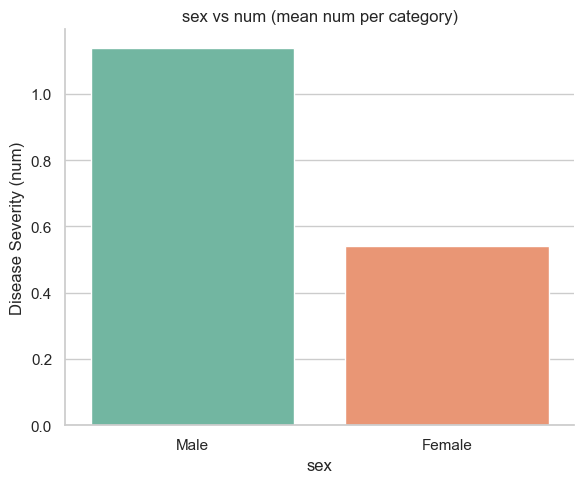

C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\youce\AppData\Local\Temp\ipykernel_21920\1201840049.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


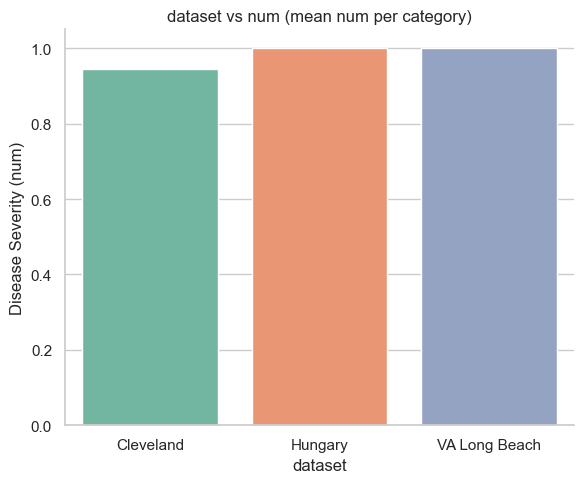

In [9]:
sns.set_theme(style="whitegrid")

for feat in ['restecg','slope','ca','thal','cp','exang','sex','dataset']:
    g = sns.catplot(
        data=df,
        x=feat,
        y='num',
        kind='bar',
        orient='v',             # vertical bars: x=feature, y=num
        ci=None,                # disable confidence interval
        palette='Set2',
        height=5, aspect=1.2    # control figure size
    )
    g.set_axis_labels(feat, 'Disease Severity (num)')
    g.ax.set_title(f'{feat} vs num (mean num per category)')
    plt.tight_layout()
    plt.show()

ML & DL Model

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['sex', 'exang', 'fbs', 'cp', 'restecg', 'slope', 'ca', 'thal', 'dataset']:
    df[col] = le.fit_transform(df[col].astype(str))

In [11]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,1,0


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df[df['num'].isin([0,1,2,3,4])]
X = df.drop('num', axis=1).values
y = df['num'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

inp = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(inp)
x = Dense(32, activation='relu')(x)
feature_layer = Dense(16, activation='relu')(x)

# Add a dummy classification head for training
out = Dense(5, activation='softmax')(feature_layer)

dl_model = Model(inputs=inp, outputs=out)
dl_model.compile(optimizer=Adam(1e-3),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

dl_model.fit(X_train, y_train, epochs=30, batch_size=32,
             validation_split=0.1, verbose=2)

# Extract features
extractor = Model(inputs=inp, outputs=feature_layer)
X_train_dl = extractor.predict(X_train)
X_test_dl  = extractor.predict(X_test)

Epoch 1/30
7/7 - 1s - 139ms/step - accuracy: 0.2047 - loss: 1.5831 - val_accuracy: 0.1667 - val_loss: 1.6736
Epoch 2/30
7/7 - 0s - 13ms/step - accuracy: 0.4558 - loss: 1.4886 - val_accuracy: 0.3750 - val_loss: 1.6412
Epoch 3/30
7/7 - 0s - 11ms/step - accuracy: 0.5628 - loss: 1.4200 - val_accuracy: 0.4167 - val_loss: 1.6155
Epoch 4/30
7/7 - 0s - 11ms/step - accuracy: 0.5721 - loss: 1.3471 - val_accuracy: 0.4167 - val_loss: 1.5824
Epoch 5/30
7/7 - 0s - 14ms/step - accuracy: 0.5581 - loss: 1.2692 - val_accuracy: 0.4167 - val_loss: 1.5403
Epoch 6/30
7/7 - 0s - 12ms/step - accuracy: 0.5581 - loss: 1.1791 - val_accuracy: 0.4167 - val_loss: 1.4968
Epoch 7/30
7/7 - 0s - 12ms/step - accuracy: 0.5721 - loss: 1.0869 - val_accuracy: 0.4167 - val_loss: 1.4603
Epoch 8/30
7/7 - 0s - 11ms/step - accuracy: 0.5860 - loss: 1.0188 - val_accuracy: 0.4167 - val_loss: 1.4218
Epoch 9/30
7/7 - 0s - 12ms/step - accuracy: 0.6233 - loss: 0.9681 - val_accuracy: 0.4167 - val_loss: 1.4024
Epoch 10/30
7/7 - 0s - 14ms

In [14]:
X_train_comb = np.hstack([X_train, X_train_dl])
X_test_comb  = np.hstack([X_test, X_test_dl])

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_comb, y_train)

y_pred = rf.predict(X_test_comb)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.27      0.36      0.31        11
           2       0.11      0.14      0.12         7
           3       0.50      0.14      0.22         7
           4       0.00      0.00      0.00         3

    accuracy                           0.57        60
   macro avg       0.34      0.30      0.30        60
weighted avg       0.56      0.57      0.55        60



C:\Users\youce\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\youce\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\youce\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

In [16]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]
meta = LogisticRegression()
stack = StackingClassifier(estimators=base_estimators,
                           final_estimator=meta, cv=5)

stack.fit(X_train_comb, y_train)
print(classification_report(y_test, stack.predict(X_test_comb)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.29      0.36      0.32        11
           2       0.12      0.14      0.13         7
           3       0.75      0.43      0.55         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.40      0.36      0.37        60
weighted avg       0.59      0.60      0.59        60



C:\Users\youce\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\youce\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\youce\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

In [17]:
import joblib

dl_model.save('models/dl_model.h5')
joblib.dump(rf, 'models/rf_model.joblib', compress=3)
joblib.dump(scaler, 'models/scaler.joblib')

['models/scaler.joblib']